In [130]:
from google.colab import files
uploaded = files.upload()


Saving hotel_bookings.csv to hotel_bookings (1).csv


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [157]:
df=pd.read_csv('hotel_bookings.csv')

In [133]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


# **some columns meaning :**

*  lead_time → Days between the booking date and the arrival date.

* meal → Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half Board, FB = Full Board, SC = Self Catering).

* country → Guest country of origin (ISO code).

* market_segment → Market segment (e.g., Direct, Corporate, Online TA (Travel Agent)).

* distribution_channel → How the booking was made (e.g., TA/TO = Travel Agent/Tour Operator).

* reserved_room_type → Room type reserved (coded letters).

* assigned_room_type → Room type actually assigned.

* booking_changes → Number of changes to the booking.

* deposit_type → Deposit policy (No Deposit, Non Refund, Refundable).

* agent → ID of travel agent.***(categorical)***

* company → ID of company that made the booking.***(categorical)***

* adr → Average Daily Rate = total revenue of booking / number of nights.

* total_of_special_requests → Number of special requests (e.g., extra bed, high floor).


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [135]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [136]:
nulls_report=pd.DataFrame({
    'count of null ':df.isna().sum(),
    'percentage of nulls':df.isna().mean()
})
print(nulls_report)

                                count of null   percentage of nulls
hotel                                        0             0.000000
is_canceled                                  0             0.000000
lead_time                                    0             0.000000
arrival_date_year                            0             0.000000
arrival_date_month                           0             0.000000
arrival_date_week_number                     0             0.000000
arrival_date_day_of_month                    0             0.000000
stays_in_weekend_nights                      0             0.000000
stays_in_week_nights                         0             0.000000
adults                                       0             0.000000
children                                     4             0.000034
babies                                       0             0.000000
meal                                         0             0.000000
country                                    488  

<Axes: >

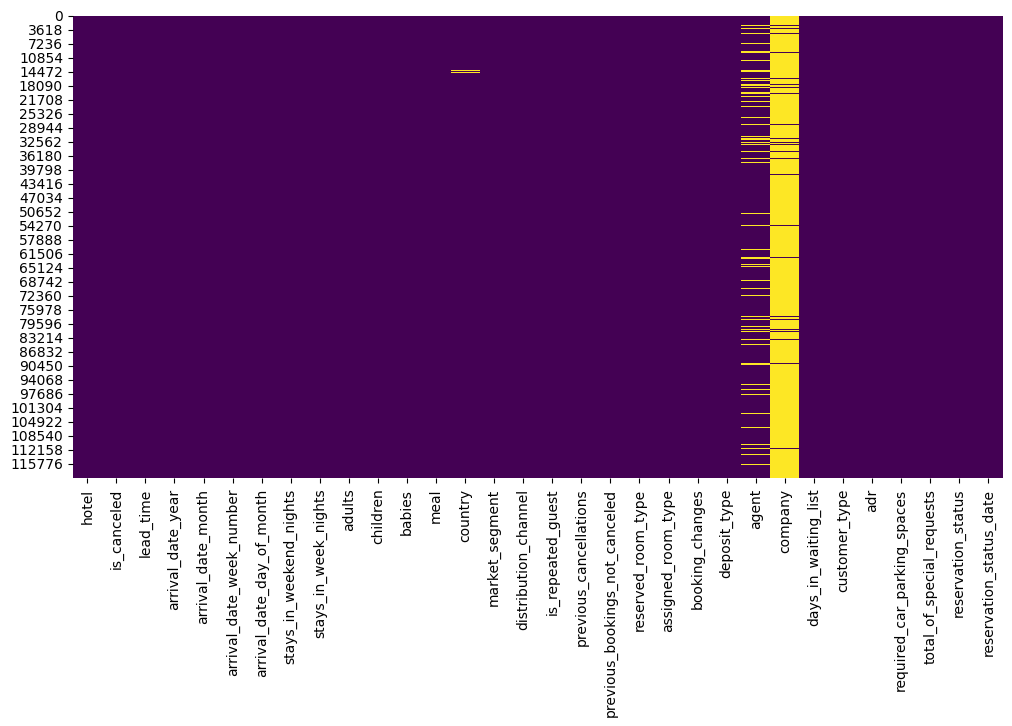

In [137]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [138]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 31994


In [139]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)]
print(
    "outlier_summary in lead_time",
  "\nnum_outliers:", outliers.shape[0],
  "\npercent_outliers:", round(100 * outliers.shape[0] / df.shape[0], 2),
  "\nlower_bound:", lower_bound,
  "\nupper_bound:", upper_bound
)


outlier_summary in lead_time 
num_outliers: 3005 
percent_outliers: 2.52 
lower_bound: -195.0 
upper_bound: 373.0


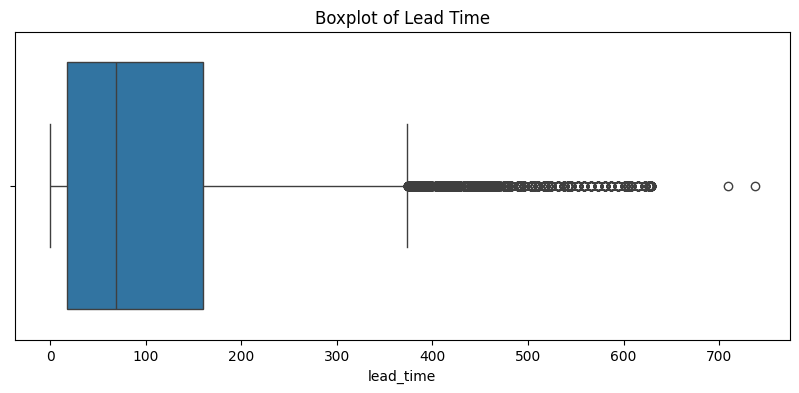

In [140]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["lead_time"])
plt.title("Boxplot of Lead Time")
plt.show()

In [141]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['adr'] < lower_bound) | (df['adr'] > upper_bound)]
print(
    "outlier_summary in adr",
  "\nnum_outliers:", outliers.shape[0],
  "\npercent_outliers:", round(100 * outliers.shape[0] / df.shape[0], 2),
  "\nlower_bound:", lower_bound,
  "\nupper_bound:", upper_bound
)

outlier_summary in adr 
num_outliers: 3793 
percent_outliers: 3.18 
lower_bound: -15.774999999999991 
upper_bound: 211.065


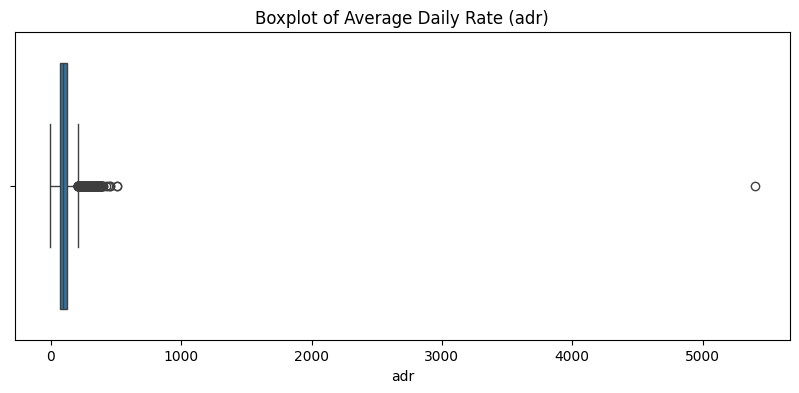

In [142]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["adr"])
plt.title("Boxplot of Average Daily Rate (adr)")
plt.show()

# data quality report

## data have many missing values in :

* agent , company: missing values here means there is no travel agent or company  

*->best solution fill it with 0*
* country : can be not recorded values

*->fill it with mode*

* children : few nulls

*->fill with zero*

## outliers

* lead_time: has many extream values normal values is < 400
extrem values may be errors or unrealistic booking times

*->cap it with 1 year*

* adr : normal values < 211
extream values can be errors or unusual group bookings.

*->cab it with max normal value*

## duplicates
* Number of duplicate rows: 32031

In [158]:
df['got_reserved_room'] = df['reserved_room_type'] == df['assigned_room_type']
match_counts = df['got_reserved_room'].value_counts()
match_percentage = df['got_reserved_room'].value_counts(normalize=True) * 100

print("Match Counts:\n", match_counts)
print("\nMatch Percentage:\n", match_percentage.round(2))

Match Counts:
 got_reserved_room
True     104473
False     14917
Name: count, dtype: int64

Match Percentage:
 got_reserved_room
True     87.51
False    12.49
Name: proportion, dtype: float64


In [159]:
room_match_summary = df.groupby('reserved_room_type')['got_reserved_room'].value_counts().unstack().fillna(0)
room_match_summary['Total'] = room_match_summary.sum(axis=1)
room_match_summary['Match %'] = (room_match_summary[True] / room_match_summary['Total'] * 100).round(2)

print(room_match_summary)


got_reserved_room     False     True    Total  Match %
reserved_room_type                                    
A                   12396.0  73598.0  85994.0    85.59
B                     130.0    988.0   1118.0    88.37
C                      49.0    883.0    932.0    94.74
D                    1465.0  17736.0  19201.0    92.37
E                     612.0   5923.0   6535.0    90.64
F                     190.0   2707.0   2897.0    93.44
G                      53.0   2041.0   2094.0    97.47
H                      17.0    584.0    601.0    97.17
L                       5.0      1.0      6.0    16.67
P                       0.0     12.0     12.0   100.00


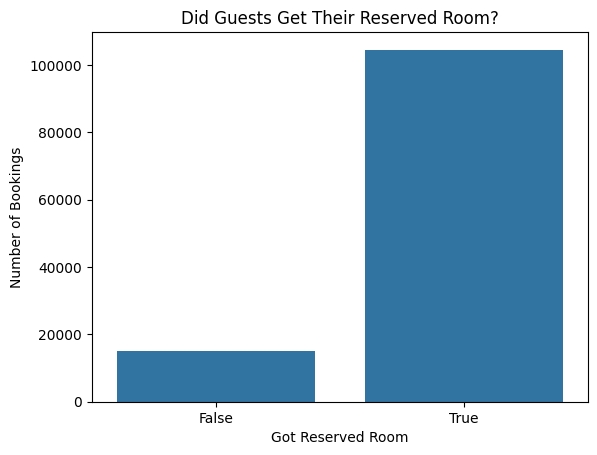

In [160]:

sns.countplot(x='got_reserved_room', data=df)
plt.title('Did Guests Get Their Reserved Room?')
plt.xlabel('Got Reserved Room')
plt.ylabel('Number of Bookings')
plt.show()


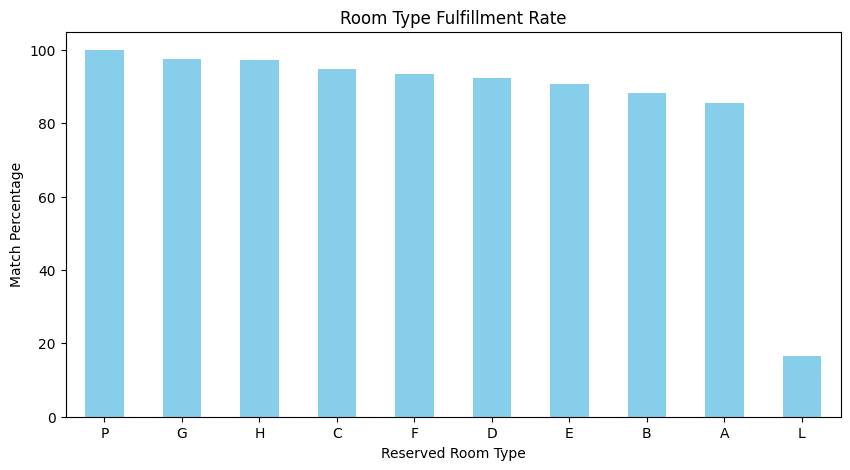

In [161]:
room_match_summary_sorted = room_match_summary.sort_values('Match %', ascending=False)

room_match_summary_sorted['Match %'].plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Room Type Fulfillment Rate')
plt.ylabel('Match Percentage')
plt.xlabel('Reserved Room Type')
plt.xticks(rotation=0)
plt.show()


In [143]:
df['agent']=df['agent'].fillna(0)
df['company']=df['company'].fillna(0)
df['children']=df['children'].fillna(0)
mode_value = df['country'].mode().iloc[0]
df['country'] = df['country'].fillna(str(mode_value))
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [144]:
Q3 = df['adr'].quantile(0.75)
upper_bound = Q3 + 1.5 * IQR
df["adr"] = df["adr"].clip(upper=upper_bound)

# Cap lead_time at 365 days
df["lead_time"] = df["lead_time"].clip(upper=365)


In [145]:
df = df.drop_duplicates()

In [146]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [147]:
df.head(
)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,365,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [148]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


# phase 3

In [149]:
# total_guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# total_nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# is_family
df['is_family'] = df.apply(lambda x: 1 if (x['children'] > 0 or x['babies'] > 0) else 0, axis=1)

In [150]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

hotel: 2 unique values
arrival_date_month: 12 unique values
meal: 5 unique values
country: 177 unique values
market_segment: 8 unique values
distribution_channel: 5 unique values
reserved_room_type: 10 unique values
assigned_room_type: 12 unique values
deposit_type: 3 unique values
customer_type: 4 unique values
reservation_status: 3 unique values


In [151]:
low_cardinality = [
    'hotel', 'arrival_date_month', 'meal',
    'market_segment', 'distribution_channel',
    'deposit_type', 'customer_type',
]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

In [152]:
country_freq = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_freq)
df.drop('country', axis=1, inplace=True)

In [153]:
country_freq = df['assigned_room_type'].value_counts(normalize=True)
df['assigned_room_type'] = df['assigned_room_type'].map(country_freq)
df.drop('assigned_room_type', axis=1, inplace=True)

In [154]:
country_freq = df['reserved_room_type'].value_counts(normalize=True)
df['reserved_room_type'] = df['reserved_room_type'].map(country_freq)
df.drop('reserved_room_type', axis=1, inplace=True)

In [155]:
df = df.drop(columns=['reservation_status', 'reservation_status_date'])


In [156]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['is_canceled'])
y = df['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)